<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/PCA/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer

In [4]:
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X = mnist.data
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X["pixel2"].sum()

0.0

In [9]:
X.min().min(), X.max().max()

(0.0, 255.0)

In [15]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [19]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
y = cancer.target

In [ ]:
y

In [20]:
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X)

In [22]:
X.mean(axis = 0)

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

In [23]:
# Co-Varience

cov = np.matmul(X.T, X)
cov.shape

(30, 30)

In [24]:
eig_value, eig_vector = np.linalg.eig(cov)

In [26]:
eig_value.shape

(30,)

In [27]:
eig_vector.shape

(30, 30)

In [28]:
eig_value

array([7.55723477e+03, 3.23838077e+03, 1.60341297e+03, 1.12698443e+03,
       9.38127682e+02, 6.86985912e+02, 3.84200245e+02, 2.71195153e+02,
       2.37213148e+02, 1.99544577e+02, 1.67238031e+02, 1.48600820e+02,
       1.37332415e+02, 8.93385328e+01, 5.35627951e+01, 4.54419337e+01,
       3.37980525e+01, 2.99400878e+01, 2.81527497e+01, 7.57025042e-02,
       4.26068962e-01, 9.04333249e-01, 3.92636394e+00, 4.65307708e+00,
       8.80884341e+00, 1.02732990e+01, 1.38499367e+01, 1.56130200e+01,
       1.77297000e+01, 1.70545766e+01])

In [30]:
np.round(eig_value * 100 / eig_value.sum(), 1)

array([44.3, 19. ,  9.4,  6.6,  5.5,  4. ,  2.3,  1.6,  1.4,  1.2,  1. ,
        0.9,  0.8,  0.5,  0.3,  0.3,  0.2,  0.2,  0.2,  0. ,  0. ,  0. ,
        0. ,  0. ,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

In [31]:
np.round(np.cumsum(eig_value) * 100 / eig_value.sum(), 1)

array([ 44.3,  63.2,  72.6,  79.2,  84.7,  88.8,  91. ,  92.6,  94. ,
        95.2,  96.1,  97. ,  97.8,  98.3,  98.6,  98.9,  99.1,  99.3,
        99.5,  99.5,  99.5,  99.5,  99.5,  99.5,  99.6,  99.6,  99.7,
        99.8,  99.9, 100. ])

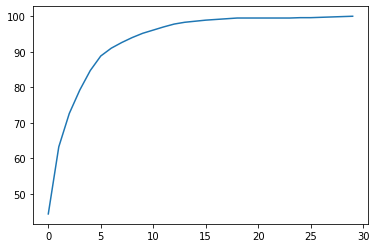

In [32]:
plt.plot(np.round(np.cumsum(eig_value) * 100 / eig_value.sum(), 1))

In [35]:
v = eig_vector[:, :2]

In [36]:
new_data = np.matmul(X, v)

In [37]:
new_data.shape

(569, 2)

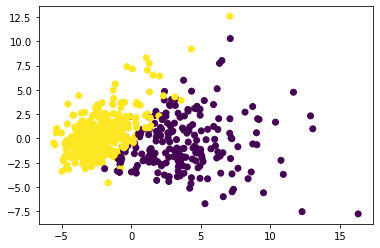

In [41]:
plt.scatter(new_data[:, 0], new_data[:, 1], c = y)

In [55]:
# Data in 30 d

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)


logR = LogisticRegression()

logR.fit(X_train, y_train)
y_pred = logR.predict(X_test)

accuracy_score(y_pred, y_test)

0.993006993006993

In [56]:
# Data in 2D

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(new_data, y)


logR = LogisticRegression()

logR.fit(X_train, y_train)
y_pred = logR.predict(X_test)

accuracy_score(y_pred, y_test)

0.958041958041958